# Trabajo Práctico Final - Parte 1

## Sección 1 - Presentación del problema específico.

**Descripción:** Dataset que describe las variables y la calidad del vino

La calidad es el atributo más importante en un vino. A diferencia de otras características que involucran plenamente a la subjetividad de quien lo bebe (no solo el gusto personal sino también los recuerdos y emociones que un vino evoca), el concepto de calidad es puramente objetivo. 

En el caso particular de la vitivinicultura, la calidad de un ejemplar involucra un sinfín de factores relacionados con la elaboración: desde la finca hasta la guarda.  

Motiva el estudio del siguiente Dataset poder aportar informacion y herramientas a aquellos productores de vinos que quieran producir dicha bebida de la mejor manera posible buscando la calidad necesaria a fin de poder incrementar sus ventas cosiderablemente como tambien asi enfocarse en los factores tecnicos que realmente realzan la calidad aprovechando los recursos de manera mas eficiente.

## Sección 2 - Preguntas y objetivos de la investigación.

### *Preguntas Generales:*

*   ¿Cuáles son las variables que podrían afectarían a la calidad del vino?
*   ¿Es necesario aumentar o disminuir la cantidad de dichas variables para aumentar la calidad?
*   ¿Cuál es la variable que más podría afectar a la calidad del vino?



### *Objetivo:*

Determinar aquellas variables que hacen a la calidad de un vino


# Sección 3 - Equipo de Trabajo.

El siguiente trabajo fué realizado por:



*   Ezequiel Barletta Paz
*   Daniela Godoy Mir



# Sección 4 - Data Acquisition.

Este es un conjunto de datos  relativos al vino tinto variante del "Vinho Verde" portugués creado por Paulo Cortez de la Universidad de Minho, Guimaraes, Portugal para la Comisión de Vitivinicultura de la Región de Vinho Verde en Porto, Portugal cargado en el sitio UCI Machine Learning Repository. 

El criterio utilizado para usar este dataset es que :
- Es un tema que nos resulta interesante.
- Es información de interés, ya que las variables allí incluidas pueden servir como análisis y asesoría a otras empresas del rubro.
- A simple vista, pareciera que los datos están completos.

A continuación se hace una breve descripción de las variables que se encuentran en este dataset:

1 - fixed acidity / acidez fija La mayoría de los ácidos involucrados con el vino o 
fijos o no volátiles (no se evaporan fácilmente).

2 - volatile acidity / acidez volátil La cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre.

3 - citric acid / ácido cítrico Encontrado en pequeñas cantidades el ácido cítrico puede agregar 'frescura' y sabor a los vinos.

4 - residual sugar / azúcar residual La cantidad de azúcar que queda después de que se detiene la fermentación. Es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.

5 - chlorides / cloruros La cantidad de sal en el vino.

6 - free sulfur dioxide / dióxido de azufre libre La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.

7 - total sulfur dioxide / dióxido de azufre total Cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero en concentraciones de SO2 libres superiores a 50 ppm, el SO2 se vuelve evidente en la nariz y el sabor del vino.

8 - density / densidad La densidad del agua es cercana a la del agua dependiendo del porcentaje de alcohol y azúcar contenido.

9 - pH / pH Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH

10 - sulphates / sulfatos Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante

11 - alcohol / alcohol El porcentaje de contenido de alcohol del vino

Output variable (based on sensory data):

12 - quality / calidad Variable de salida o target (basada en datos sensoriales, puntuación entre 0 y 10). Indica qué tan bueno es el vino en este estándar de calidad.




## 4.1 - Importación de librerías.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as metrics


# Librerías para importar/exportar el modelo
import json
import pickle

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm

### 4.2 - Dataset.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
# importamos el DataSet para poder empezar a trabajar con el creando el dataframe.

df= pd.read_csv("winequality-red.csv", delimiter=";")

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Sección 5 - EDA: Exploratory Data Analysis

## Análisis Descriptivo

### Tipos de datos

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Seleccionar variables con un determinado tipo de dato

In [ ]:
df.select_dtypes(['int64','float64'])

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
numericas = df.select_dtypes(['int64','float64']).columns

### Estadística Descriptiva Básica

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
quality=df['quality']
quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [ ]:
quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Contar Valores Faltantes

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Histogramas

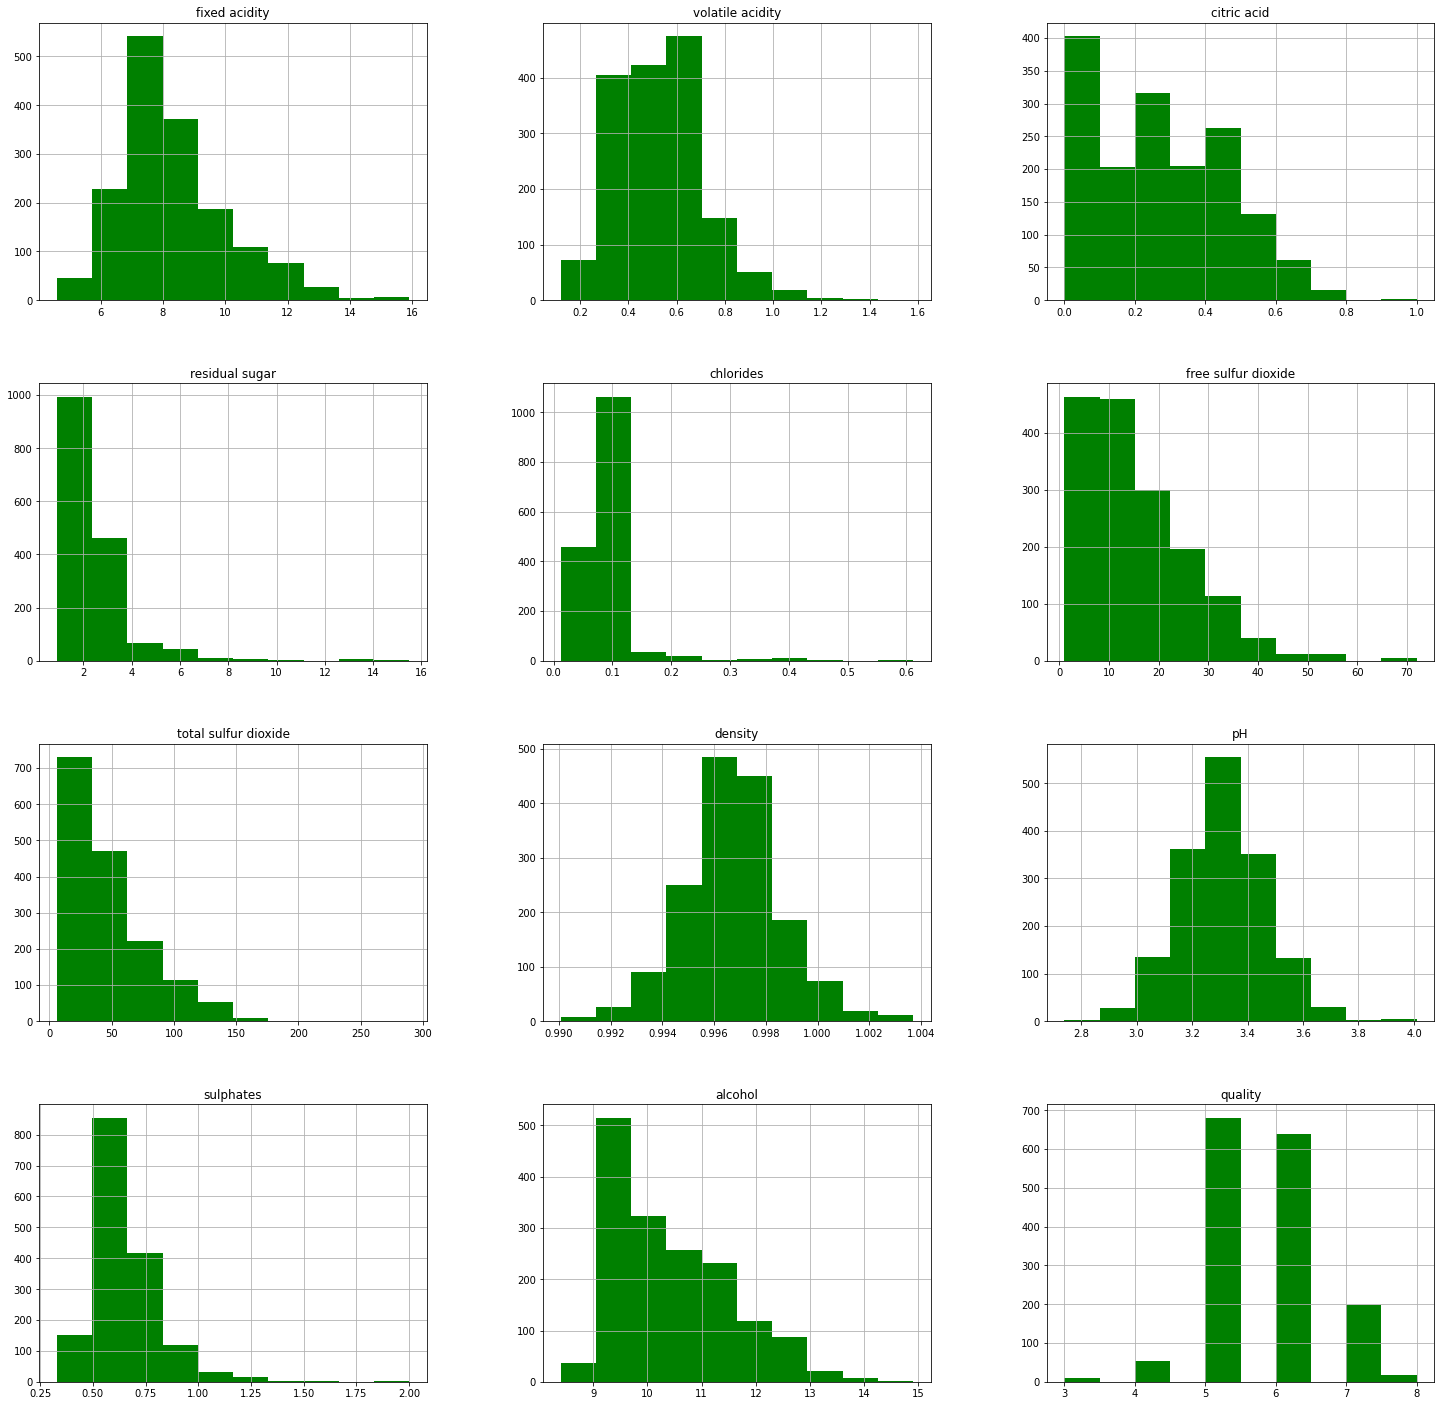

In [ ]:
hists = df.hist(figsize=(25,25), color = 'green')

**Conclusión**: Se observa que la mayoría de nuestras variables tienen una distribución normal.

### Identificar valores atípicos

#### Creación de Boxplots

In [ ]:
numericas = df.select_dtypes(['int64','float64']).columns


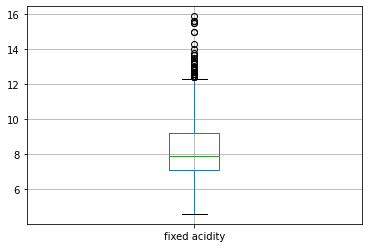

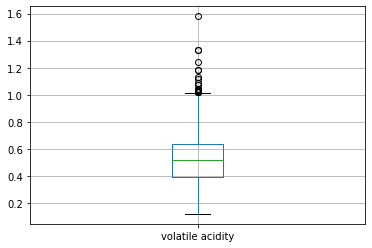

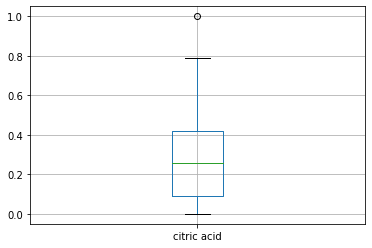

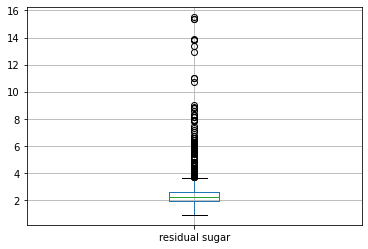

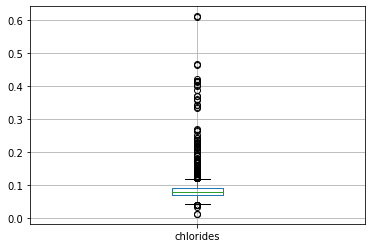

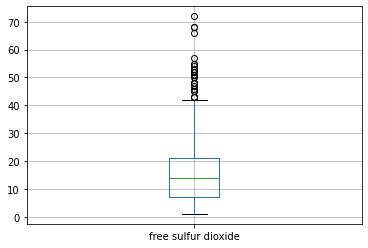

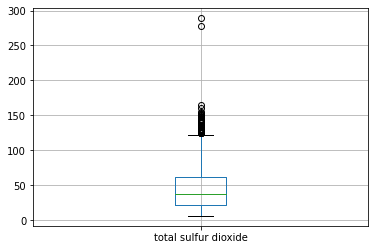

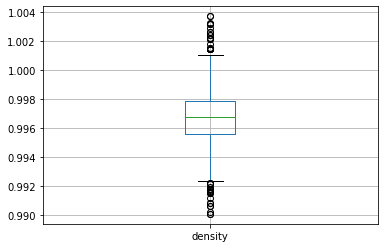

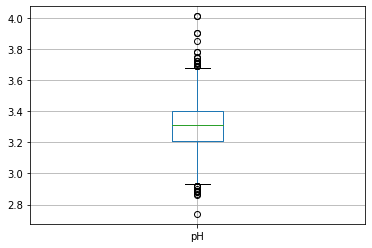

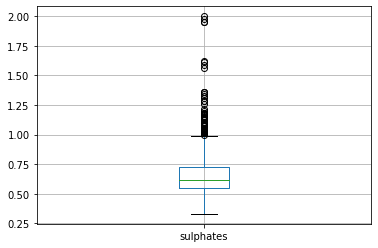

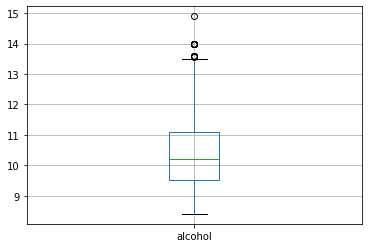

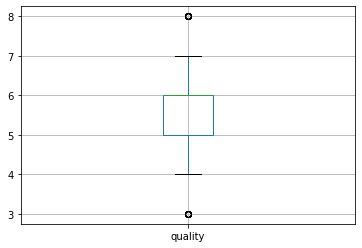

In [ ]:
for column in numericas:
    plt.figure()
    df.boxplot([column])

**Conclusión**: Los datos que conforman nuestras variables poseen una cantidad considerable de datos atípicos.

#### Outliers por cuantil (95%)

In [ ]:
(df[numericas]>df[numericas].quantile(0.95)).sum()

fixed acidity           78
volatile acidity        76
citric acid             78
residual sugar          79
chlorides               80
free sulfur dioxide     77
total sulfur dioxide    80
density                 71
pH                      73
sulphates               79
alcohol                 70
quality                 18
dtype: int64

#### Outliers por cuantil (5%)

In [ ]:
(df[numericas]<df[numericas].quantile(0.05)).sum()

fixed acidity           71
volatile acidity        73
citric acid              0
residual sugar          80
chlorides               78
free sulfur dioxide     53
total sulfur dioxide    62
density                 80
pH                      72
sulphates               72
alcohol                 61
quality                 63
dtype: int64

**Conclusión**: El Dataset no contiene datos nulos. Gracias a la información que nos da la Estadística Descriptiva se observa que hay una gran diferencia entre el tercer percentil y el valor maximo en varias caracteristicas lo que puede indicar la presencia de datos atipicos. 


# Sección 6 - Selección de variable a estudiar.
La variable "quality" es de tipo discreta y nos indica la calidad del vino en una escala de 0 al 10 donde este último valor es el de mayor calidad. En nuestro dataset, los valores analizados de calidad se encuentran en un rango que va de 3 a 8 y el valor que se repite mas es el 5.

<function matplotlib.pyplot.show(*args, **kw)>

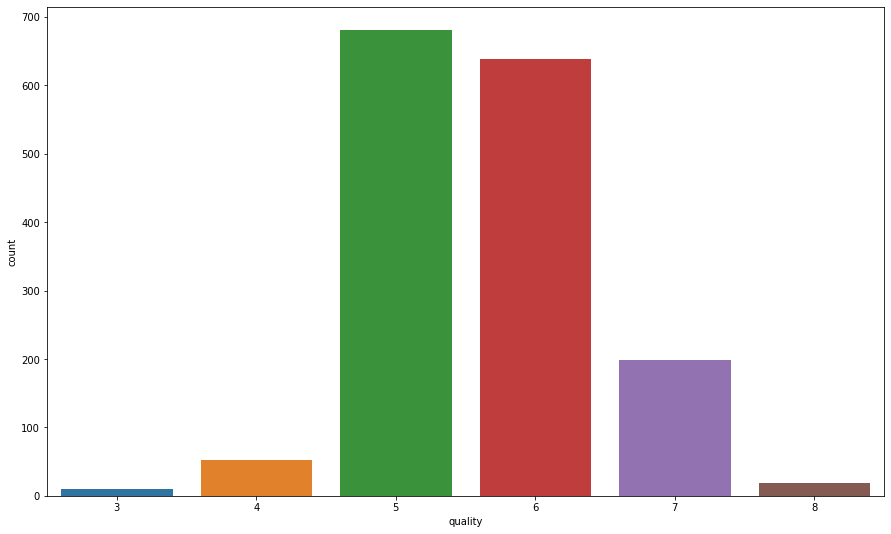

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=df,x='quality')
plt.show

Para favorecer la visualización y el tratamiento de los datos se ha decidido categorizar los valores de calidad en 3 grupos principales (baja, media y alta).
Es por este que se agregará una columna al DataFrame llamada "quality_category" donde se indique la categoría de calidad: 'Baja calidad', 'Calidad media', 'Alta calidad'.

Rango de valores de cada categoría:

*   Baja calidad: 0-4
*   Calidad media: 5-7
*   Alta calidad: 8-10



In [ ]:
df['quality_category'] = df['quality'].apply(lambda x:  "Baja calidad" if x <5 else ("Alta calidad" if x>7 else "Calidad media"))
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality quality_category  
1594     10.5        5    Calidad media  
1595     11.2        6    Calidad media  
1596     11.0        6    Calidad media  
1597     10.2        5    Calidad media  
1598     11.0        6    Calidad media

In [ ]:
df.quality_category = df.quality_category.astype('category')    # se redefine el tipo de variable de la columna "quality category" como tipo "category"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_category      1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


<function matplotlib.pyplot.show(*args, **kw)>

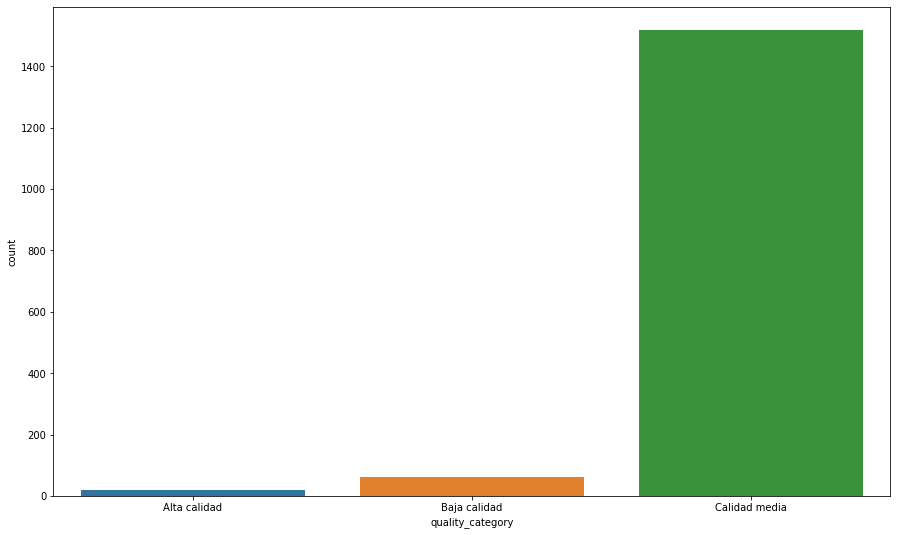

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=df,x='quality_category')
plt.show

**Conclusión**: Mediante la gráfica anterior podemos observar que la gran mayoria de los vinos analizados entran en la categoria 'calidad media'. 

# Sección 7 - Separación de datos: Prueba y Entrenamiento

In [ ]:
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(df):
    print(len(train_index))
    print(len(test_index))
df['Train'] = 0
df.loc[df.index.isin(train_index),'Train'] = 1

1119
480


### Cortar atípicos al rango de outliers

In [ ]:
for var in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    lim_sup = df.loc[df['Train']==1, var].quantile(0.95)
    lim_inf = df.loc[df['Train']==1, var].quantile(0.05)
    df[var].clip(lim_inf, lim_sup, inplace=True)

# Sección 8 - Análisis de correlación entre variables.

### Relaciones matemáticas

In [ ]:
df[df['Train']==1].corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.291342     0.691433   
volatile acidity          -0.291342          1.000000    -0.588851   
citric acid                0.691433         -0.588851     1.000000   
residual sugar             0.158681          0.047650     0.165668   
chlorides                  0.197944          0.144799     0.143329   
free sulfur dioxide       -0.168165          0.027937    -0.077964   
total sulfur dioxide      -0.120940          0.111181    -0.003618   
density                    0.648948          0.025372     0.364838   
pH                        -0.675091          0.263183    -0.554668   
sulphates                  0.244117         -0.327502     0.348763   
alcohol                   -0.031019         -0.219974     0.121728   
quality                    0.161302         -0.417033     0.259801   
Train                           NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.158681   0.197944            -0.168165   
volatile acidity            0.047650   0.144799             0.027937   
citric acid                 0.165668   0.143329            -0.077964   
residual sugar              1.000000   0.180148             0.099673   
chlorides                   0.180148   1.000000             0.022322   
free sulfur dioxide         0.099673   0.022322             1.000000   
total sulfur dioxide        0.175689   0.134206             0.701899   
density                     0.385862   0.360929            -0.005364   
pH                         -0.095109  -0.228774             0.074762   
sulphates                   0.043435   0.115253             0.031134   
alcohol                     0.092268  -0.252958            -0.118539   
quality                     0.010746  -0.173114            -0.100283   
Train                            NaN        NaN                  NaN   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.120940  0.648948 -0.675091   0.244117   
volatile acidity                  0.111181  0.025372  0.263183  -0.327502   
citric acid                      -0.003618  0.364838 -0.554668   0.348763   
residual sugar                    0.175689  0.385862 -0.095109   0.043435   
chlorides                         0.134206  0.360929 -0.228774   0.115253   
free sulfur dioxide               0.701899 -0.005364  0.074762   0.031134   
total sulfur dioxide              1.000000  0.128346 -0.063734  -0.018536   
density                           0.128346  1.000000 -0.315379   0.174631   
pH                               -0.063734 -0.315379  1.000000  -0.137750   
sulphates                        -0.018536  0.174631 -0.137750   1.000000   
alcohol                          -0.271466 -0.477551  0.178161   0.169797   
quality                          -0.219875 -0.149551 -0.096837   0.354183   
Train                                  NaN       NaN       NaN        NaN   

                       alcohol   quality  Train  
fixed acidity        -0.031019  0.161302    NaN  
volatile acidity     -0.219974 -0.417033    NaN  
citric acid           0.121728  0.259801    NaN  
residual sugar        0.092268  0.010746    NaN  
chlorides            -0.252958 -0.173114    NaN  
free sulfur dioxide  -0.118539 -0.100283    NaN  
total sulfur dioxide -0.271466 -0.219875    NaN  
density              -0.477551 -0.149551    NaN  
pH                    0.178161 -0.096837    NaN  
sulphates             0.169797  0.354183    NaN  
alcohol               1.000000  0.470186    NaN  
quality               0.470186  1.000000    NaN  
Train                      NaN       NaN    NaN

In [ ]:
results_corr = df.corr(method = 'pearson').loc['quality']
df_corr = pd.DataFrame(data = np.array(results_corr), index = results_corr.index, columns = ['Corr']).sort_values(by=['Corr'], ascending=False)
df_corr

Corr
quality               1.000000
alcohol               0.483077
sulphates             0.342260
citric acid           0.227705
fixed acidity         0.135513
Train                 0.029224
residual sugar        0.022783
free sulfur dioxide  -0.052147
pH                   -0.063902
density              -0.171165
chlorides            -0.178028
total sulfur dioxide -0.201477
volatile acidity     -0.384311

### Relaciones gráficas

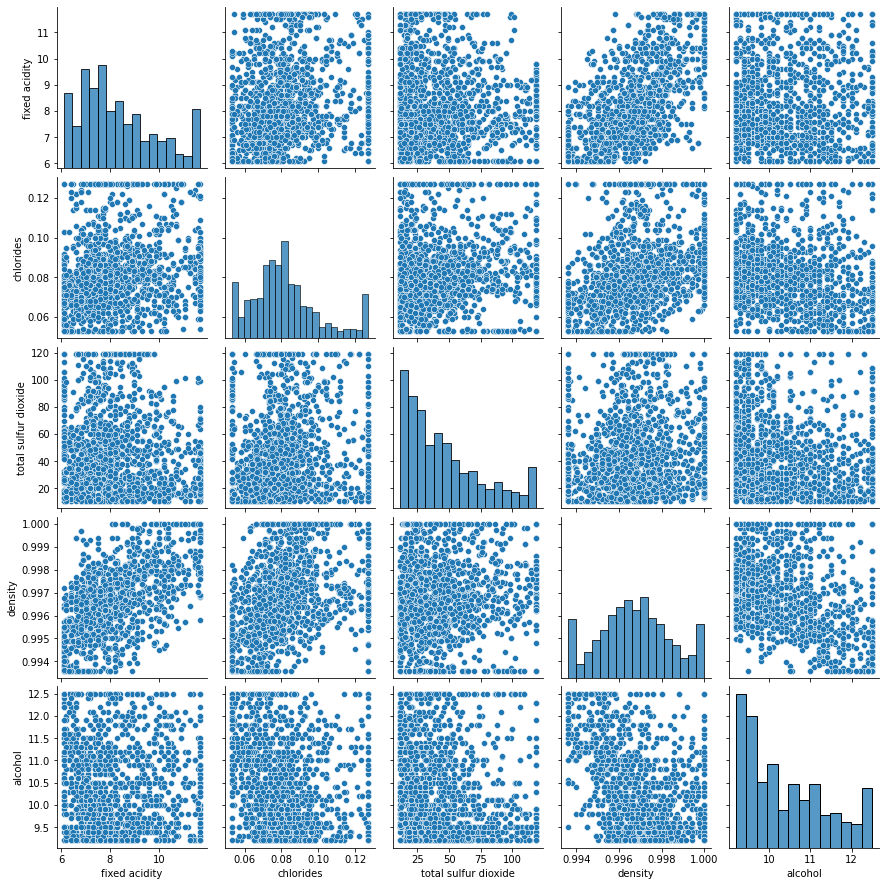

In [ ]:
sns.pairplot(df[['fixed acidity',
       'chlorides', 'total sulfur dioxide', 'density','alcohol']]).savefig('graficas.png')

### Relaciones gráficas en clasificación

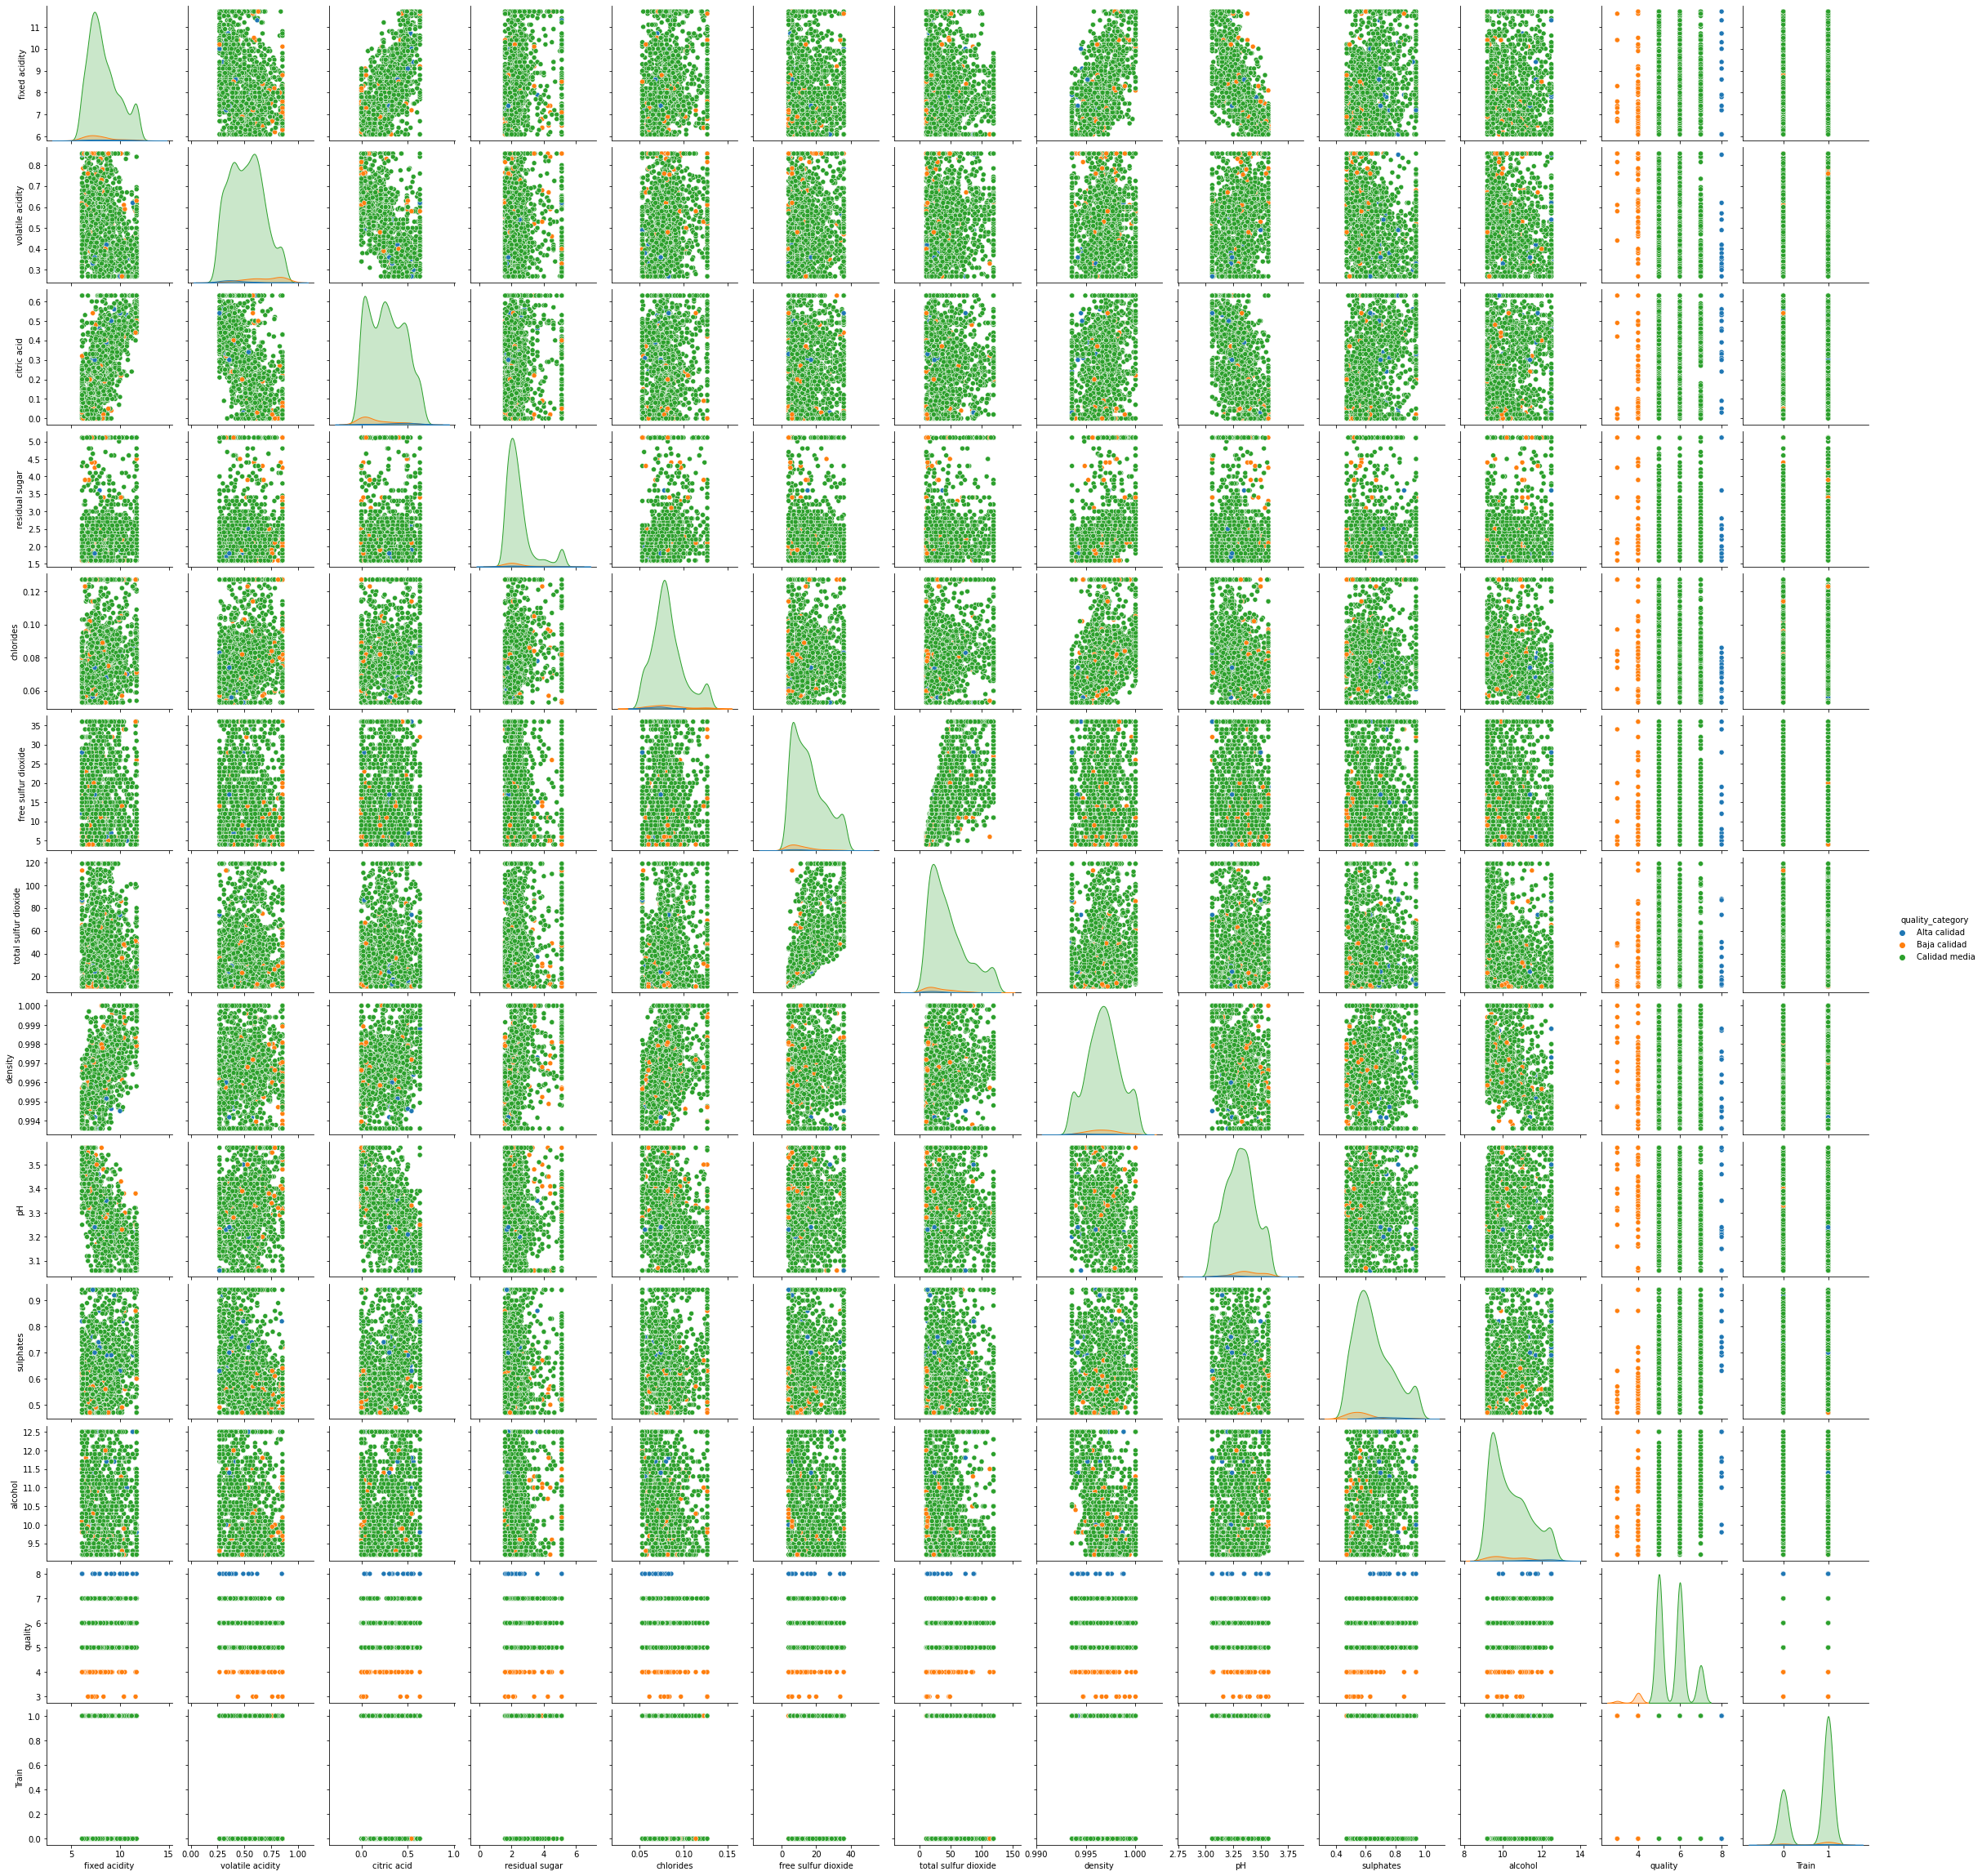

In [ ]:
sns.pairplot(df, hue = 'quality_category').savefig('graficas2.png')

### 8.1- Conclusiones:

Se observa que las variables que tienen una correlación más fuerte entre sí son:

(Positivamente)

*   fixed acidity - citric acid
*   fixed acidity - density
*   free sulfur dioxide - total sulfur dioxide


(Negativamente)


*   fixed acidity - pH
*   Volatile acidity - citric acid
*   citric acid - pH


Por otra parte, como nuestro trabajo se centra en el estudio de los factores que afectan a la calidad nos centraremos en esta variable es por eso que se observa que las variables que mayor relación tienen con la calidad son:

(Positivamente)

*   Alcohol
*   Sulphates


(Negativamente)

*   Volatile acidity









A continuación se puede observar graficamente lo expuesto anteriormente.

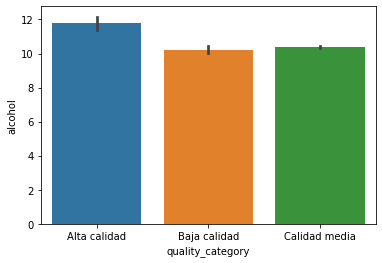

In [ ]:
sns.barplot(data = df, y = "alcohol", x = "quality_category")


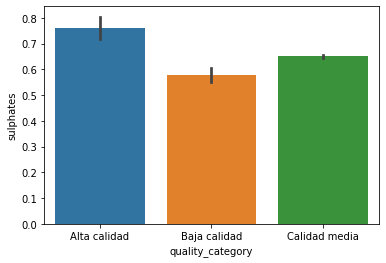

In [ ]:
sns.barplot(data = df, y = "sulphates", x = "quality_category")


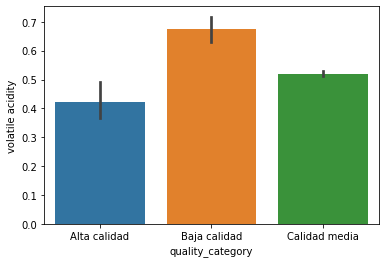

In [ ]:
sns.barplot(data = df, y = "volatile acidity", x = "quality_category")

**Conclusión**: Con ayuda de estos tres gráficos podemos decir que a mayor cantidad de "sulfathes" y "alcohol" la calidad del vino es mejor mientras que la cantidad de la variable "volatile acidity"

# Sección 9 - Análisis de componentes principales.

### PCA

In [ ]:


WINEpca = pd.read_csv("winequality-red.csv", delimiter=";")
datos = WINEpca


In [ ]:
datos.var(axis=0)

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12']
)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1        0.487883         -0.265129     0.473335        0.139154   0.197427   
PC2       -0.004173          0.338968    -0.137358        0.167736   0.189788   
PC3       -0.164829         -0.227089     0.100229        0.243620  -0.026608   
PC4       -0.231098          0.041858    -0.056736       -0.383038   0.654778   
PC5       -0.078779          0.299379    -0.120149        0.709363   0.266237   
PC6        0.055531          0.297287     0.136633        0.109311   0.337337   
PC7       -0.307215         -0.626234     0.244149        0.283854   0.230547   
PC8        0.200529          0.146126     0.296333       -0.170626  -0.186923   
PC9       -0.174578         -0.060223    -0.220975        0.278187  -0.419936   
PC10      -0.182956          0.155106     0.346086       -0.052237  -0.003863   
PC11      -0.256438          0.377161     0.624328        0.088078  -0.208617   
PC12       0.638580          0.004662    -0.070037        0.183646   0.053931   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
PC1             -0.045881              0.004067  0.370301 -0.432721   
PC2              0.259483              0.363971  0.330781 -0.065440   
PC3              0.616111              0.540732 -0.168723  0.069771   
PC4             -0.033711             -0.028460 -0.200693 -0.005466   
PC5             -0.159413             -0.218453  0.208793  0.257647   
PC6             -0.042648              0.115954 -0.425667 -0.480354   
PC7             -0.138260             -0.110209 -0.122546  0.185692   
PC8             -0.019356              0.089897  0.079500  0.314693   
PC9             -0.318000              0.121823 -0.249074 -0.461916   
PC10            -0.585389              0.589188  0.043538  0.207610   
PC11             0.237933             -0.355047 -0.231453 -0.005599   
PC12            -0.051922              0.069793 -0.566645  0.341230   

      sulphates   alcohol   quality  
PC1    0.254535 -0.073177  0.112489  
PC2   -0.109334 -0.502709 -0.473166  
PC3    0.212913  0.224971  0.223369  
PC4    0.560502 -0.091701 -0.036669  
PC5    0.214835  0.259726  0.137584  
PC6   -0.403743  0.392176 -0.141830  
PC7   -0.233402 -0.121719 -0.412388  
PC8    0.275492  0.471189 -0.612247  
PC9    0.452689 -0.096528 -0.240243  
PC10  -0.071919 -0.110605  0.260240  
PC11   0.097637 -0.319949  0.052466  
PC12   0.067793 -0.317640  0.008470

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

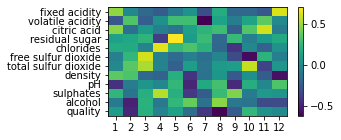

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.26009731 0.1868235  0.14024331 0.10125174 0.0811053  0.05521602
 0.05152648 0.04215605 0.03427563 0.02732662 0.01501822 0.00495983]


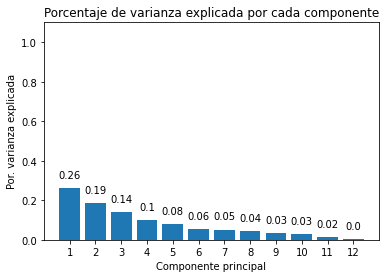

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 26% de la varianza observada en los datos y la segunda el 18.68%. Las dos últimas componentes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.26009731 0.44692081 0.58716412 0.68841586 0.76952116 0.82473718
 0.87626366 0.91841971 0.95269534 0.98002195 0.99504017 1.        ]


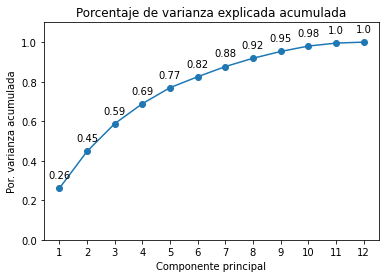

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 45% de la varianza observada.



##Trasformación


Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12'],
    index   = datos.index
)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.779442  1.157303 -1.386581 -0.044944  0.233885 -0.976983 -0.110528   
1 -1.004185  2.071838  0.007759  0.466119  0.182454  0.657775 -1.376790   
2 -0.915783  1.393434 -0.699286  0.345292  0.095210  0.254823 -0.720338   
3  2.404077 -0.213792  0.066381 -0.889182 -1.524742 -0.132218  0.200660   
4 -1.779442  1.157303 -1.386581 -0.044944  0.233885 -0.976983 -0.110528   

        PC8       PC9      PC10      PC11      PC12  
0  0.040320 -0.294420  0.073112 -0.262937  0.048362  
1 -0.176714  0.587342 -0.565736  0.048784 -0.139565  
2 -0.088687  0.546495 -0.162065 -0.199140 -0.120391  
3 -0.202816 -0.506212  0.241135 -0.107616  0.319764  
4  0.040320 -0.294420  0.073112 -0.262937  0.048362

La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [ ]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.779442  1.157303 -1.386581 -0.044944  0.233885 -0.976983 -0.110528   
1 -1.004185  2.071838  0.007759  0.466119  0.182454  0.657775 -1.376790   
2 -0.915783  1.393434 -0.699286  0.345292  0.095210  0.254823 -0.720338   
3  2.404077 -0.213792  0.066381 -0.889182 -1.524742 -0.132218  0.200660   
4 -1.779442  1.157303 -1.386581 -0.044944  0.233885 -0.976983 -0.110528   

        PC8       PC9      PC10      PC11      PC12  
0  0.040320 -0.294420  0.073112 -0.262937  0.048362  
1 -0.176714  0.587342 -0.565736  0.048784 -0.139565  
2 -0.088687  0.546495 -0.162065 -0.199140 -0.120391  
3 -0.202816 -0.506212  0.241135 -0.107616  0.319764  
4  0.040320 -0.294420  0.073112 -0.262937  0.048362

###Reconstrucción
Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [ ]:
# Recostruccion de las proyecciones
# ==============================================================================
#Para ejecutar la reconstruccion descomentar las variables de abajo
#recostruccion = pca_pipe.inverse_transform(X=proyecciones)
#recostruccion = pd.DataFrame(
                    #recostruccion,
                    #columns = datos.columns,
                    #index   = datos.index
#)
#print('------------------')
#print('Valores originales')
#print('------------------')
#display(recostruccion.head())

#print('---------------------')
#print('Valores reconstruidos')
#print('---------------------')
#display(datos.head())

# Entrenamiento de Algoritmos

### Variables seleccionadas

In [ ]:
varSelected = ['alcohol', 'sulphates', 'volatile acidity']

### Preparación Final de Datos

In [ ]:
X_train = df.loc[df['Train']==1, varSelected]
y_train = df.loc[df['Train']==1, 'quality_category']

X_test = df.loc[df['Train']==0, varSelected]
y_test = df.loc[df['Train']==0, 'quality_category']

### KNN

In [ ]:
#Importamos todo lo necesario para poder aplicar el modelo KNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Cargamos el dataframe
dataframe = pd.read_csv("winequality-red.csv", delimiter=";")
#Con head 10 vemos los primeras 10 registros
dataframe.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [ ]:
# Aprovechamos para ver un resumen estadistico de los datos
dataframe.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Son 1599 registros. La calidad(quality) va del 1 al 9. El pH va 3 a 4,1. y las graduaciones alcoholicas están entre 8.4 y 14 con una media de 10,42 y a partir del desvío estándar podemos ver que la mayoría están entre 10,42-1.065668 y 10,42+1.065668.

In [ ]:
#Un poco de Visualización

dataframe.hist()
plt.show()

In [ ]:
# Veamos realmente cuantas Valoraciones de Calidad(quality) tenemos
print(dataframe.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


Con eso confirmamos que hay sobre todo de 5 y 6 'estrellas'.


In [ ]:
# Graficamos mejor la cantidad de graduacion alcoholica y confirmamos que la mayoría de los vinos tienen entre 9 y 14 de graduacion alcoholica.
print(dataframe.groupby('alcohol').size())



alcohol
8.400000      2
8.500000      1
8.700000      2
8.800000      2
9.000000     30
             ..
13.500000     1
13.566667     1
13.600000     4
14.000000     7
14.900000     1
Length: 65, dtype: int64


##Preparamos las entradas
Creamos nuestro X e y de entrada y los sets de entrenamiento y test.

In [ ]:
X = dataframe[['sulphates','alcohol']].values
y = dataframe['quality'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Usaremos k-Nearest Neighbor con Scikit Learn

In [ ]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.63
Accuracy of K-NN classifier on test set: 0.55


Vemos que la precisión que nos da es de 63% en el set de entrenamiento y del 55% para el de test.

###Precisión del modelo


In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  0   0   0   2   0   0]
 [  0   0  10   4   0   0]
 [  0   0 113  54   2   0]
 [  0   0  60  93  17   0]
 [  0   0   7  21  12   0]
 [  0   0   1   1   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.59      0.67      0.63       169
           6       0.53      0.55      0.54       170
           7       0.35      0.30      0.32        40
           8       0.00      0.00      0.00         5

    accuracy                           0.55       400
   macro avg       0.25      0.25      0.25       400
weighted avg       0.51      0.55      0.53       400



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cómo se ve la puntuación F1 es del 55%, no es tan buena nota, pero continuaremos

##Grafico del KNN

Ahora realizaremos la grafica con la clasificación obtenida, la que nos ayuda a ver fácilmente en donde caerán las predicciones

In [ ]:
h = .02  # tamaño de la muestra

# Creamos el mapa de colores
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#3333FF','#FFFFCC','#FFFFFF','#7D667D','#FF9999','#003333'])
cmap_bold = ListedColormap(['#FF3300', '#33FF33','#00FFFF','#FFFF33','#FF33FF','#7D337D','#FF6699','#003300'])

# creamos una instancia de Neighbors Classifier y ajustamos los datos.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Trazamos el límite de decisión. Para ello, asignaremos un color a cada punto de la muestra [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Ponemos el resultado en un diagrama de color.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Trazamos también los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF3300', label='1')
patch1 = mpatches.Patch(color='#33FF33', label='2')
patch2 = mpatches.Patch(color='#00FFFF', label='3')
patch3 = mpatches.Patch(color='#FFFF33', label='4')
patch4 = mpatches.Patch(color='#FF33FF', label='5')
patch5 = mpatches.Patch(color='#7D337D', label='6')
patch6 = mpatches.Patch(color='#FF6699', label='7')
patch7 = mpatches.Patch(color='#003300', label='8')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4,patch5,patch6,patch7])

    
plt.title("8-Class classification (k = %i, weights = '%s')" )

plt.show()

**Conclusión:** 
A 'ojo' podemos observar una region muy fuerte que indica que hay una tendencia de que los vinos que tienen una calidad de 4 'estrellas' generalmente tienen de graducion alcoholica de entre 9 y 10 con una cantidad de sulfitos ubicada claramente al rededor de los 0.5
Tambien se puede observar que aquellos que tienen una calidad de 5 'estrellas' se distribuyen mas apliamente verticalmente, generalmente entre las graduaciones alcoholicas de 9 y 13, con una cantidad de sulfitos generalmente oscilando entre los 0.5 y 1.

##Elegir el mejor valor de k

Antes vimos que asignamos el valor n_neighbors=7 como valor de “k” y obtuvimos buenos resultados. ¿Pero de donde salió ese valor?. Pues realmente tuve que ejecutar este código que viene a continuación, donde vemos distintos valores k y la precisión obtenida.

([<matplotlib.axis.XTick at 0x7f778b954eb0>,
 <a list of 5 Text major ticklabel objects>)

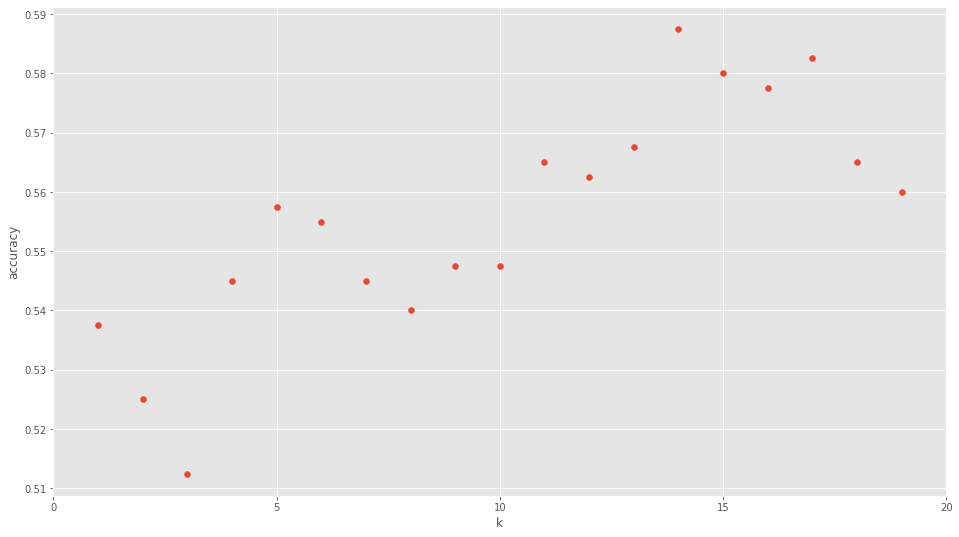

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

En la gráfica vemos que con valores k=7 a k=14 es donde mayor precisión se logra.



##Clasificar y/o Predecir nuevas muestras


Ya tenemos nuestro modelo y nuestro valor de k. Ahora, lo lógico será usarlo! Pues supongamos que nos llegan nuevos vinos! veamos como predecir su calidad de 2 maneras. La primera:

In [ ]:
print(clf.predict([[0.5, 9]]))

[4]


Este resultado nos indica que para un vino con una cantidad de 0.5 sulfitos  y graduacion alcoholica 9, nos valorara el vino con una calidad de 4 'estrellas'.

Pero también podríamos obtener las probabilidades que de nos den vinos de calidad 1,2,3,4,5,6,7 o 8 'estrellas' con predict_proba():

In [ ]:
print(clf.predict_proba([[10, 0.5]]))

[[0.14177213 0.14519416 0.28596541 0.4270683  0.         0.        ]]


Aquí vemos que para las coordenadas 10, 0.5 hay 42% probabilidades que haya un vino de calidad de '4' estrellas. Puedes comprobar en el gráfico anterior, que encajan en las zonas que delimitamos anteriormente.